https://colab.research.google.com/drive/1QfReq5yqA5PtSM0dpDc8WNJGrJSrqLxi

In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 2s 1us/step


In [0]:
train_data[0]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

557056/550378 [==============================] - 1s 2us/step


In [0]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
x_train.shape

(8982, 10000)

In [0]:
X_test = x_train[:1000]
X_train = x_train[1000:]
y_test = one_hot_train_labels[:1000]
y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(X_train, y_train,epochs=20,batch_size=512,validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 634us/step - loss: 3.2956 - acc: 0.4302 - val_loss: 2.4997 - val_acc: 0.5770
Epoch 2/20
7982/7982 [==============================] - 0s 56us/step - loss: 1.9662 - acc: 0.6249 - val_loss: 1.6305 - val_acc: 0.6590
Epoch 3/20
7982/7982 [==============================] - 0s 57us/step - loss: 1.3372 - acc: 0.7127 - val_loss: 1.3000 - val_acc: 0.7020
Epoch 4/20
7982/7982 [==============================] - 0s 58us/step - loss: 1.0260 - acc: 0.7727 - val_loss: 1.1543 - val_acc: 0.7420
Epoch 5/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.8121 - acc: 0.8216 - val_loss: 1.0619 - val_acc: 0.7660
Epoch 6/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.6452 - acc: 0.8608 - val_loss: 0.9956 - val_acc: 0.7920
Epoch 7/20
7982/7982 [========================

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


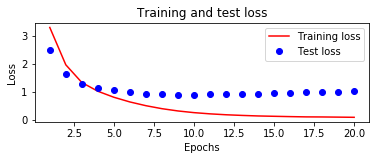

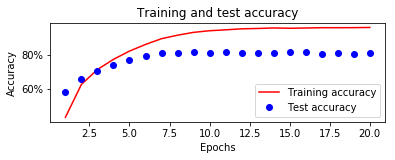

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [0]:
pred = model.predict(X_test)

In [0]:
pred2 = np.argmax(pred,axis=1)

In [0]:
import pandas as pd
df = pd.DataFrame([pred2, np.argmax(y_test,axis=1)]).T

In [0]:
df.columns = ['prediction','actual']

In [0]:
df['dummy']=1

In [0]:
final_pred =pd.crosstab(df['actual'],df['prediction'],values = df['dummy'], aggfunc='sum').reset_index()

In [0]:
final_pred.head()

prediction,actual,0,1,2,3,4,6,8,9,10,11,12,13,14,16,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,36,37,40,41,42,45
0,0,4.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,37.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,2.0,NaN,333.0,14.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,5.0,NaN,13.0,199.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [0]:
final_pred.shape

(41, 36)